### Exploring Student Data
Imagine that you work for a school district and have collected some data on local students and their parents. You’ve been tasked with answering some important questions:

- How are students performing in their math classes?
- What do students’ parents do for work?
- How often are students absent from school?

This project analyzes a dataset of student performance, exploring key factors like math grades, parental job categories, and other variables. It aims to uncover insights into how different variables affect academic performance, using robust EDA and ETL techniques.

In this project, you’ll explore and summarize some student data in order to answer these questions. We will use many charts and plots in order to explain our findings

In [1]:
# we load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Import data
students = pd.read_csv('students.csv')

In [3]:
# Overview of the dataset
print("Dataset Info:")
students.info()
print("\nFirst few rows of the dataset:")
display(students.head())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   address     395 non-null    object
 1   absences    395 non-null    int64 
 2   Mjob        395 non-null    object
 3   Fjob        395 non-null    object
 4   math_grade  395 non-null    int64 
dtypes: int64(2), object(3)
memory usage: 15.6+ KB

First few rows of the dataset:


,address,absences,Mjob,Fjob,math_grade
0,U,6,at_home,teacher,6
1,U,4,at_home,other,6
2,U,10,at_home,other,10
3,U,2,health,services,15
4,U,4,other,other,10


In [4]:
# Standardize column names
students.columns = [col.strip().lower() for col in students.columns]
display(students)

,address,absences,mjob,fjob,math_grade
0,U,6,at_home,teacher,6
1,U,4,at_home,other,6
2,U,10,at_home,other,10
3,U,2,health,services,15
4,U,4,other,other,10
...,...,...,...,...,...
390,U,11,services,services,9
391,U,3,services,services,16
392,R,3,other,other,7
393,R,0,services,other,10


In [5]:
# Print summary statistics for all columns
print(students.describe(include = 'all'))

       address    absences   mjob   fjob  math_grade
count      395  395.000000    395    395  395.000000
unique       2         NaN      5      5         NaN
top          U         NaN  other  other         NaN
freq       307         NaN    141    217         NaN
mean       NaN    5.708861    NaN    NaN   10.415190
std        NaN    8.003096    NaN    NaN    4.581443
min        NaN    0.000000    NaN    NaN    0.000000
25%        NaN    0.000000    NaN    NaN    8.000000
50%        NaN    4.000000    NaN    NaN   11.000000
75%        NaN    8.000000    NaN    NaN   14.000000
max        NaN   75.000000    NaN    NaN   20.000000


In [6]:
# Check for missing values
print("\nMissing values per column:")
print(students.isnull().sum())



Missing values per column:
address       0
absences      0
mjob          0
fjob          0
math_grade    0
dtype: int64


In [7]:
# Handle missing values (if any)
#students.fillna(method='ffill', inplace=True)

In [8]:
# Handle categorical variables by ensuring consistent casing
students['mjob'] = students['mjob'].str.capitalize()

In [9]:
# === Descriptive Statistics ===
# Summary statistics
print("\nSummary Statistics:")
print(students.describe(include='all'))


Summary Statistics:
       address    absences   mjob   fjob  math_grade
count      395  395.000000    395    395  395.000000
unique       2         NaN      5      5         NaN
top          U         NaN  Other  other         NaN
freq       307         NaN    141    217         NaN
mean       NaN    5.708861    NaN    NaN   10.415190
std        NaN    8.003096    NaN    NaN    4.581443
min        NaN    0.000000    NaN    NaN    0.000000
25%        NaN    0.000000    NaN    NaN    8.000000
50%        NaN    4.000000    NaN    NaN   11.000000
75%        NaN    8.000000    NaN    NaN   14.000000
max        NaN   75.000000    NaN    NaN   20.000000


In [10]:
# Math grades: Mean, Median, Mode, Range, Standard Deviation, MAD
math_grade_mean = students['math_grade'].mean()
math_grade_median = students['math_grade'].median()
math_grade_mode = students['math_grade'].mode()[0]
math_grade_range = students['math_grade'].max() - students['math_grade'].min()
math_grade_std = students['math_grade'].std()
math_grade_mad = np.mean(np.abs(students['math_grade'] - students['math_grade'].mean()))

In [11]:
print("\nMath Grade Statistics of the Maths Grades are:\n")
print(f"Mean: {math_grade_mean}\nMedian: {math_grade_median}\nMode: {math_grade_mode}\nRange: {math_grade_range}")
print(f"Standard Deviation: {math_grade_std}\nMean Absolute Deviation(MAD): {math_grade_mad}")


Math Grade Statistics of the Maths Grades are:

Mean: 10.415189873417722
Median: 11.0
Mode: 10
Range: 20
Standard Deviation: 4.5814426109978434
Mean Absolute Deviation(MAD): 3.4289889440794745


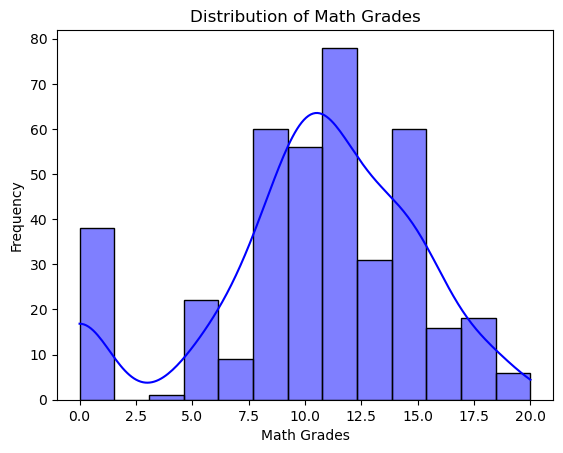

In [12]:
# === Exploratory Data Analysis (EDA) ===
# Distribution of math grades
sns.histplot(x='math_grade', data=students, kde=True, color='blue')
plt.title('Distribution of Math Grades')
plt.xlabel('Math Grades')
plt.ylabel('Frequency')
plt.show()

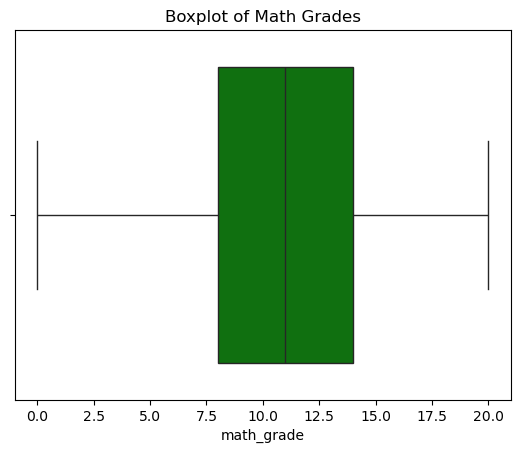

In [13]:
# Boxplot to detect outliers
sns.boxplot(x='math_grade', data=students, color='green')
plt.title('Boxplot of Math Grades')
plt.show()

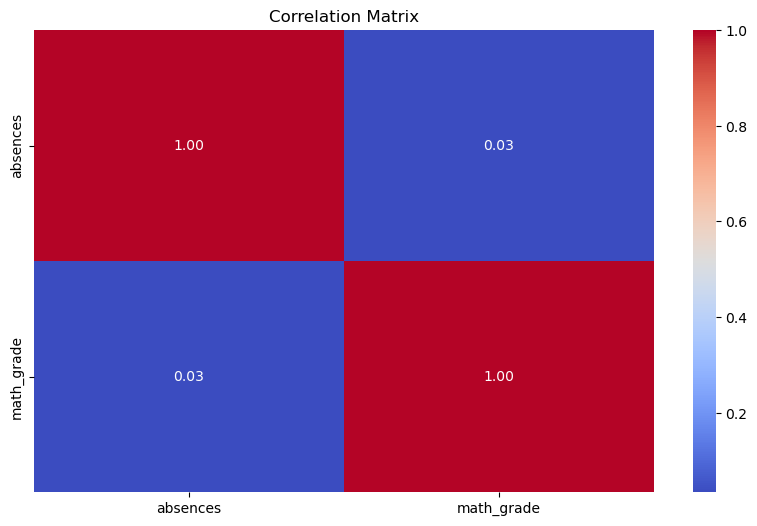

In [14]:
# Select only numeric columns and compute and plot the correlation matrix

numeric_students = students.select_dtypes(include=['number'])
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_students.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


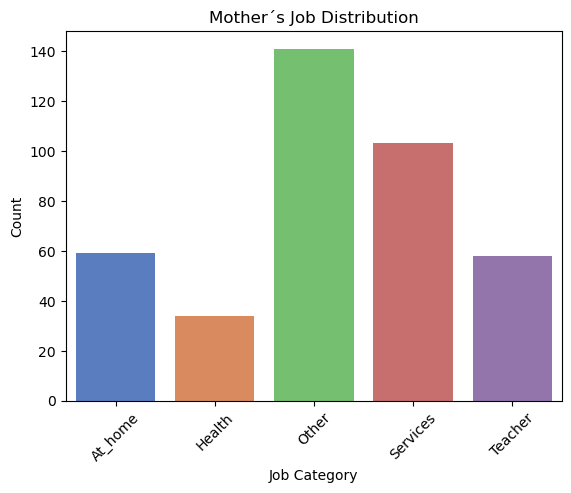

In [15]:
# Bar chart of Mjob
sns.countplot(x='mjob', data=students, hue='mjob', palette='muted', dodge=False, legend=False)
plt.title("Mother´s Job Distribution")
plt.xlabel('Job Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [16]:
# Calculate number of students with mothers in each job category, using value_counts()
mjob_counts = students.mjob.value_counts()
print("\n The actualnumber of students with mothers in each job category is the follow:")
print(mjob_counts)


 The actualnumber of students with mothers in each job category is the follow:
mjob
Other       141
Services    103
At_home      59
Teacher      58
Health       34
Name: count, dtype: int64


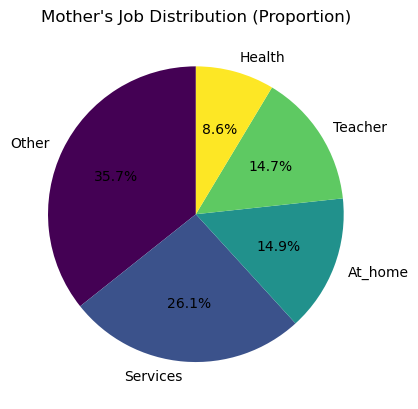

In [17]:
# Pie chart of Mjob
students['mjob'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, cmap='viridis')
plt.title("Mother's Job Distribution (Proportion)")
plt.ylabel('')
plt.show()


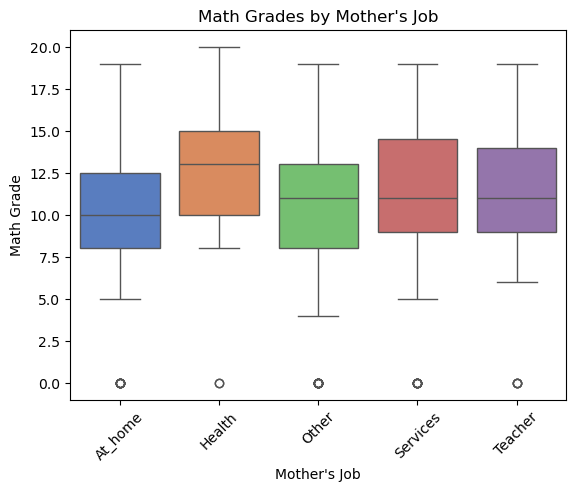

In [18]:
# Relationship between math grades and mother's job
sns.boxplot(x='mjob', y='math_grade', data=students, hue='mjob', palette='muted', dodge=False, legend=False)
plt.title("Math Grades by Mother's Job")
plt.xlabel("Mother's Job")
plt.ylabel('Math Grade')
plt.xticks(rotation=45)
plt.show()

In [19]:
# Proportion of students with mothers in each job category
mjob_proportion = students['mjob'].value_counts(normalize=True) * 100
print("\nProportion of students by Mother's Job:")
print(mjob_proportion)


Proportion of students by Mother's Job:
mjob
Other       35.696203
Services    26.075949
At_home     14.936709
Teacher     14.683544
Health       8.607595
Name: proportion, dtype: float64


### Conclusion
 The analysis reveals key trends and correlations in the dataset:
 1. The average math grade is {math_grade_mean:.2f}, with a standard deviation of {math_grade_std:.2f}.
 2. Mothers' job categories show a varied distribution, with some influencing math grades significantly.
 3. Outliers in math grades have been identified, which could be further investigated in the future to look for any relations between thhem
    
 These insights provide a foundation for understanding the factors influencing academic performance.